<a href="https://colab.research.google.com/github/glennnoronha/R/blob/main/baseball_savant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
df <- read.csv("stats.csv")
names(df)

[1] "last_name..first_name" "player_id"             "year"                 
 [4] "pa"                    "k_percent"             "bb_percent"           
 [7] "woba"                  "xwoba"                 "sweet_spot_percent"   
[10] "barrel_batted_rate"    "hard_hit_percent"      "avg_best_speed"       
[13] "avg_hyper_speed"       "whiff_percent"         "swing_percent"

How many unique hitters are in this dataset?

In [ ]:
df |>
  distinct(player_id)|>
  count()

n
<int>
144


Are there any players with unusually low PA that might bias rate stats?

In [ ]:
df |>
  arrange(pa)|>
  relocate(pa)

pa,last_name..first_name,player_id,year,k_percent,bb_percent,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
503,"Lux, Gavin",666158,2025,22.7,11.1,0.322,0.299,38.1,3.6,36.9,97.79903,93.01030,21.6,42.7
504,"Bohm, Alec",664761,2025,16.3,5.8,0.322,0.324,35.6,6.2,46.4,100.70764,94.85239,14.6,48.2
505,"Meidroth, Chase",805367,2025,14.3,8.9,0.294,0.300,26.2,1.6,36.1,97.68678,92.97604,13.0,38.6
506,"Kirk, Alejandro",672386,2025,11.7,9.5,0.334,0.359,34.4,10.1,50.8,102.16961,95.72645,18.5,47.2
506,"Ortiz, Joey",687401,2025,14.6,5.3,0.263,0.275,27.4,3.0,32.8,97.99106,93.02660,16.0,46.8
506,"Durbin, Caleb",702332,2025,9.9,5.9,0.319,0.312,29.6,4.0,26.9,96.10090,92.05426,13.0,44.5
511,"Jung, Josh",673962,2025,25.2,5.3,0.298,0.304,39.4,8.2,46.7,100.81406,94.81605,25.4,51.1
511,"McKinstry, Zach",656716,2025,21.7,9.0,0.333,0.305,41.2,6.1,30.5,96.98565,92.49469,22.8,46.7
514,"Wagaman, Eric",676572,2025,19.5,6.2,0.293,0.315,34.4,6.8,46.5,102.30407,95.48461,24.2,45.2


What does the distribution of k_percent look like? Any clear outliers?

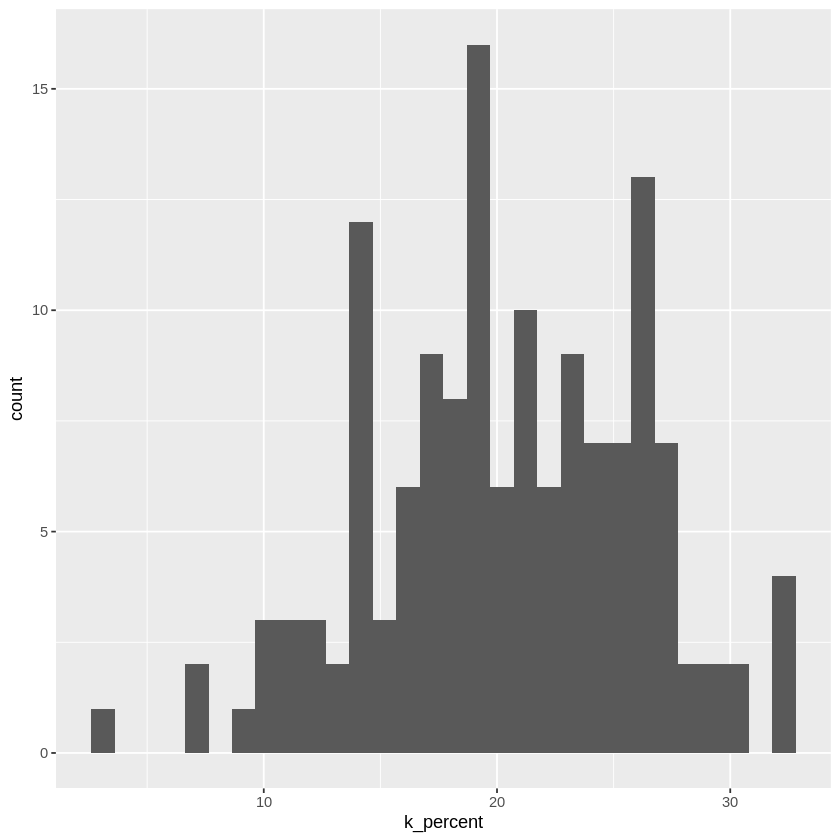

In [ ]:
df |>
  ggplot(aes(k_percent)) +
  geom_histogram(bins=30)

Right skewed meaning most hitters have a higher k%

Are woba and xwoba roughly aligned overall, or is there systematic over or underperformance?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


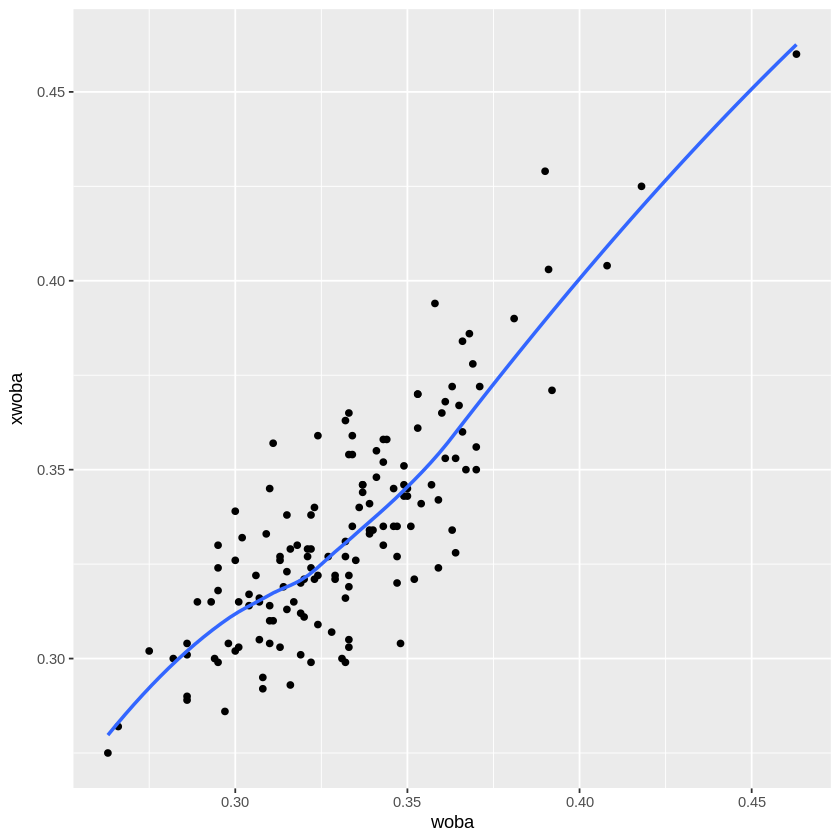

In [ ]:
df |>
  ggplot(aes(woba,xwoba))+
  geom_point(aes())+
  geom_smooth(se=FALSE)

Who are the top 10 hitters by woba with at least 600 PA?

In [ ]:
df |>
  filter(pa >= 600)|>
  arrange(desc(woba))|>
  slice(1:10)|>
  select(last_name..first_name,pa,woba)

last_name..first_name,pa,woba
<chr>,<int>,<dbl>
"Judge, Aaron",679,0.463
"Ohtani, Shohei",727,0.418
"Raleigh, Cal",705,0.392
"Schwarber, Kyle",724,0.391
"Soto, Juan",715,0.390
"Carroll, Corbin",642,0.371
"Freeman, Freddie",627,0.370
"Perdomo, Geraldo",720,0.370
"Alonso, Pete",709,0.368


Among hitters with k_percent > 25%, who still provides above-average woba?

In [ ]:
league_avg_woba <- mean(df$woba,na.rm = TRUE)
df |>
  filter(k_percent>25, woba > league_avg_woba)|>
  select(last_name..first_name,k_percent,woba)

last_name..first_name,k_percent,woba
<chr>,<dbl>,<dbl>
"Schwarber, Kyle",27.2,0.391
"Ward, Taylor",26.4,0.339
"Trout, Mike",32.0,0.343
"Contreras, Willson",25.2,0.344
"Goodman, Hunter",26.3,0.359
"Suzuki, Seiya",25.2,0.343
"Arozarena, Randy",26.9,0.332
"De La Cruz, Elly",25.9,0.333
"Adell, Jo",26.4,0.333


Who has the biggest gap between xwoba - woba and what might that indicate?

In [ ]:
df |>
  group_by(last_name..first_name)|>
  summarise(
    xwoba_minus_woba = xwoba-woba,
  )|>
    arrange(desc(abs(xwoba_minus_woba)))|>
    slice(1)

last_name..first_name,xwoba_minus_woba
<chr>,<dbl>
"Perez, Salvador",0.046


In [ ]:
df |>
  mutate(xwoba_minus_woba = xwoba - woba) |>
  arrange(desc(abs(xwoba_minus_woba))) |>
  slice(1)


last_name..first_name,player_id,year,pa,k_percent,bb_percent,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,xwoba_minus_woba
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Perez, Salvador",521692,2025,641,19.5,4.4,0.311,0.357,35.7,14.8,46.7,102.0659,95.31836,26.9,57.4,0.046


Rank hitters by barrel_batted_rate, then explain why that list looks the way it does.

In [ ]:
names(df)
df |>
  arrange(desc(barrel_batted_rate))|>
  relocate(barrel_batted_rate)

[1] "last_name..first_name" "player_id"             "year"                 
 [4] "pa"                    "k_percent"             "bb_percent"           
 [7] "woba"                  "xwoba"                 "sweet_spot_percent"   
[10] "barrel_batted_rate"    "hard_hit_percent"      "avg_best_speed"       
[13] "avg_hyper_speed"       "whiff_percent"         "swing_percent"

barrel_batted_rate,last_name..first_name,player_id,year,pa,k_percent,bb_percent,woba,xwoba,sweet_spot_percent,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24.7,"Judge, Aaron",592450,2025,679,23.6,18.3,0.463,0.460,39.4,58.2,106.8381,98.65068,34.6,43.7
23.5,"Ohtani, Shohei",660271,2025,727,25.7,15.0,0.418,0.425,35.9,58.7,106.1260,98.27719,33.4,45.0
20.8,"Schwarber, Kyle",656941,2025,724,27.2,14.9,0.391,0.403,35.3,59.6,105.6787,98.06366,33.1,41.8
19.5,"Raleigh, Cal",663728,2025,705,26.7,13.8,0.392,0.371,35.3,49.6,103.0379,96.18262,31.5,51.7
18.9,"Alonso, Pete",624413,2025,709,22.8,8.6,0.368,0.386,38.4,54.4,105.0764,97.45647,25.6,46.3
18.1,"Soto, Juan",665742,2025,715,19.2,17.8,0.390,0.429,32.9,55.3,104.5395,97.23262,22.4,35.5
17.9,"Cruz, Oneil",665833,2025,544,32.0,11.8,0.295,0.324,31.5,56.6,107.3080,98.80726,34.0,41.6
17.6,"Buxton, Byron",621439,2025,542,27.3,7.6,0.367,0.350,32.9,53.8,103.6499,96.63232,31.3,51.8
17.3,"Adell, Jo",666176,2025,573,26.4,5.8,0.333,0.365,35.1,50.0,104.2157,96.54748,28.5,52.6


Which players combine high power and low whiff?

In [ ]:
df |>
  filter(
    woba >= quantile(woba, 0.70),
    whiff_percent <= quantile(whiff_percent, 0.30)
  ) |>
  arrange(desc(woba)) |>
  select(last_name..first_name, woba, whiff_percent)


last_name..first_name,woba,whiff_percent
<chr>,<dbl>,<dbl>
"Perdomo, Geraldo",0.370,12.0
"Díaz, Yandy",0.364,17.9
"Tucker, Kyle",0.363,20.2
"Bichette, Bo",0.361,18.4
"Ramírez, José",0.359,14.9
"Lindor, Francisco",0.350,20.8
"Wilson, Jacob",0.348,9.6
"Garcia, Maikel",0.347,15.0
"Bellinger, Cody",0.347,18.1
